In [59]:
# Essential Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas_profiling as ppf
import calendar


In [60]:
# Modelling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Data Preparation

In [61]:
customer_data = pd.read_excel("Data/CustomersData.xlsx")
online_sales = pd.read_csv("Data/Online_Sales.csv")
marketing_spend = pd.read_csv("Data/Marketing_Spend.csv")
disc_coupon = pd.read_csv("Data/Discount_Coupon.csv")
tax_amount = pd.read_excel("Data/Tax_amount.xlsx")

### Lets see the data

In [62]:
customer_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [63]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [64]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Date                 52924 non-null  object 
 4   Product_SKU          52924 non-null  object 
 5   Product_Description  52924 non-null  object 
 6   Product_Category     52924 non-null  object 
 7   Quantity             52924 non-null  int64  
 8   Avg_Price            52924 non-null  float64
 9   Delivery_Charges     52924 non-null  float64
 10  Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [65]:
## Changing the dtype of the date column
online_sales["Date"] = pd.to_datetime(online_sales["Date"])

In [66]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [67]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [68]:
# Lets make Some new variables
marketing_spend["Date"] = pd.to_datetime(marketing_spend["Date"])
marketing_spend["Month"] = marketing_spend["Date"].dt.month.apply(lambda x:calendar.month_abbr[x])
marketing_spend["Total_Spend"] = marketing_spend.Offline_Spend+ marketing_spend.Online_Spend

In [69]:

disc_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [70]:
tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [71]:
# Lets make dates a datetime variable
marketing_spend["Date"] = pd.to_datetime(marketing_spend["Date"])
marketing_spend["Month"] = marketing_spend["Date"].dt.month.apply(lambda x:calendar.month_abbr[x])
marketing_spend["Total_Spend"] = marketing_spend.Offline_Spend+ marketing_spend.Online_Spend

# Data Preparation

In [72]:
# Joining the online_sales and customer_data
sales_customer = pd.merge(online_sales,customer_data,on="CustomerID",how="inner").sort_values(by=["CustomerID","Date"])

In [73]:

sales_customer = sales_customer[['CustomerID','Gender', 'Location',
       'Tenure_Months', 'Transaction_ID', 'Transaction_Date',"Date",
       'Product_SKU', 'Product_Description', 'Product_Category', 'Quantity',
       'Avg_Price', 'Delivery_Charges', 'Coupon_Status']]

In [74]:
sales_customer = sales_customer.drop("Transaction_Date",axis=1)

In [75]:
import calendar
sales_customer["Month"]=sales_customer.Date.dt.month.apply(lambda x:calendar.month_abbr[x])

In [76]:
# There is a space Product_Category column name
disc_coupon.columns = ['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct']

In [77]:
## Adding cupon information in that particular month
sales_customer = pd.merge(sales_customer,disc_coupon,on=["Month","Product_Category"],how="left")

In [78]:
## Adding tax information
sales_customer = pd.merge(sales_customer,tax_amount,on="Product_Category",how="left")

In [79]:
sales_customer.Discount_pct = sales_customer.Discount_pct/100

In [81]:
sales_customer.isna().sum()

CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Date                     0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Coupon_Code            400
Discount_pct           400
GST                      0
dtype: int64

In [83]:
# First lets fill nan with 0 to make calculations possible
# Where there is no discount is given 
sales_customer.fillna(0,inplace=True)

In [88]:
# We can encode coupon status to be 0 for not used and clicked and 1 for used 
# It will also make calculations easy 
# just multiply with the coupon status encoded column to add or not add the discount percentage

In [89]:

sales_customer["Invoice_Value"] = (sales_customer.Quantity*sales_customer.Avg_Price)*(1-sales_customer.Discount_pct*sales_customer.Coupon_Status.replace(['Used', 'Clicked','Not Used'],[1,0,0]))*(1+sales_customer.GST)+sales_customer.Delivery_Charges

In [92]:
sales_customer.to_csv("Summaries/Final_DF.csv")

# EDA

In [95]:
df_eda = sales_customer.copy()

### Q1 Understanding how many customers acquired every month

In [99]:
cust_each_month = df_eda[~df_eda.CustomerID.duplicated()].groupby("Month")["CustomerID"].count().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

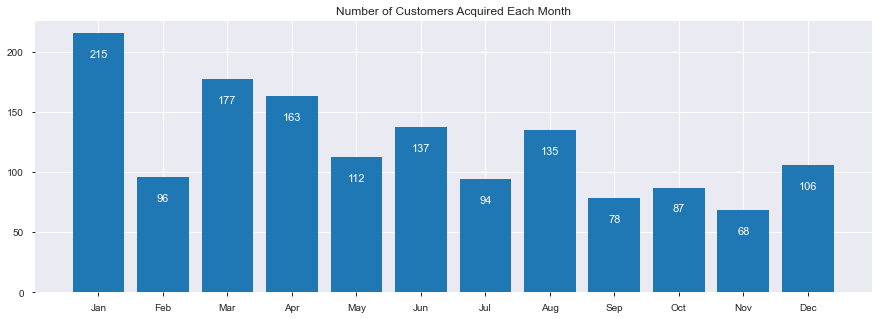

In [100]:
cust_each_month.columns = ["Month","Customers_Acquired"]
plt.figure(figsize = (15,5))
bars = plt.bar(cust_each_month.Month,cust_each_month.Customers_Acquired)
plt.title("Number of Customers Acquired Each Month")
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 20, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)
